# Лабораторная работа №6

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import sys
sns.set(color_codes=True)

## Постановка задачи
Найти оценки коэффициентов линейной регрессии $y_i = a + bx_i + e_i$, используя 20 точек на отрезке $[-1.8; 2]$ с равномерным шагом равным $0.2$. Ошибку $e_i$ считать нормально распределённой с параметрами $(0, 1)$. В качестве эталонной зависимости взять $y_i = 2 + 2x_i + e_i$. При построении оценок коэффициентов использовать два критерия: критерий наименьших квадратов и критерий наименьших модулей.

Проделать то же самое для выборки, у которой в значения $y_1$ и $y_{20}$ вносятся возмущения $10$ и $-10$.

In [2]:
l, r = -1.8, 2
h = 0.2
a, b = 2, 2

def etalon_y(x):
    return a * x + b

## Реализация

In [3]:
def fit(X, params):
    return X.dot(params)


def cost_function(params, X, y):
    return np.sum(np.abs(y - fit(X, params)))


def generate(l, r, h):
    n = int((r - l) / h) + 2
    x = np.linspace(-1.8, 2, n)
    err = np.random.standard_normal(n)
    y = etalon_y(x) + err
    return x, y

def perturbation(y):
    y[0] += 10
    y[-1] -= 10
    return y

def mnk(x, y):
    a2 = (np.mean(x*y) - np.mean(x) * np.mean(y))/(np.mean(x*x) - np.mean(x)**2)
    b2 = np.mean(y) - a2 * np.mean(x)

    return a2, b2


def mnm(x, y, betas):
    X = np.asarray([np.ones(20, ), x]).T
    output = minimize(cost_function, betas, args=(X, y), method='SLSQP')

    y_hat = fit(X, output.x)

    return x, y_hat, output.x


In [8]:
def do(x, y, ax):
    ax.set_ylabel("y")
    ax.set_xlabel("x")
    
    ax.scatter(x, y, label='Выборка')
    y_tmp = etalon_y(x)
    
    print("%12s:\t a = %lf, b = %lf" % ("Модель", a, b))
    ax.plot(x, etalon_y(x), 'b', label='Модель')
    
    m, c = mnk(x, y)
    y1_tmp = m * x + c
    print("%12s:\t a = %lf, b = %lf" % ("МНК", m, c))
    ax.plot(x, y1_tmp, 'r', label='МНК')
    
    p1 = sum(pow((y1_tmp - y_tmp), 2))
    
    
    m, y2_tmp, k = mnm(x, y, np.array([2, 2]))
    ax.plot(m, y2_tmp, 'g', label='МНМ')
    print("%12s:\t a = %lf, b = %lf" % ("МНМ", k[0], k[1]))
    ax.legend()
    
    p2 = sum(pow((y2_tmp - y_tmp), 2))
    
    print("p1 =", p1)
    print("p2 =", p2)
    print(y_tmp)
    print(y1_tmp)
    print(y2_tmp)

def research():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), squeeze=False)
    
    ax = axes[np.unravel_index(0, shape=axes.shape)]
    ax.set_title("Без возмущений", fontsize=16, fontweight="bold")
    print("Without perturbation:")
    
    x, y = generate(l, r, h)
    do(x, y, ax)
    print()
    
    ax = axes[np.unravel_index(1, shape=axes.shape)]
    ax.set_title("C возмущениями", fontsize=16, fontweight="bold")
    print("With perturbation:")
    
    x, y = generate(l, r, h)
    y = perturbation(y)
    do(x, y, ax)
    
    fig.savefig("pictures/Linear_regression")

Without perturbation:
      Модель:	 a = 2.000000, b = 2.000000
         МНК:	 a = 1.502176, b = 1.878484
         МНМ:	 a = 1.709260, b = 1.562526
p1 = 7.17910264857043
p2 = 7.328441418259856
[-1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2.   2.4  2.8  3.2  3.6
  4.   4.4  4.8  5.2  5.6  6. ]
[-0.82543337 -0.52499812 -0.22456288  0.07587236  0.3763076   0.67674285
  0.97717809  1.27761333  1.57804857  1.87848382  2.17891906  2.4793543
  2.77978955  3.08022479  3.38066003  3.68109527  3.98153052  4.28196576
  4.582401    4.88283624]
[-1.10328671 -0.79078153 -0.47827635 -0.16577117  0.14673401  0.45923919
  0.77174437  1.08424954  1.39675472  1.7092599   2.02176508  2.33427026
  2.64677544  2.95928062  3.2717858   3.58429098  3.89679616  4.20930133
  4.52180651  4.83431169]

With perturbation:
      Модель:	 a = 2.000000, b = 2.000000
         МНК:	 a = 0.393610, b = 1.894664
         МНМ:	 a = 1.457003, b = 1.563784
p1 = 70.05583883867672
p2 = 11.943993093500573
[-1.6 -1.2 -0.8 -0.4  

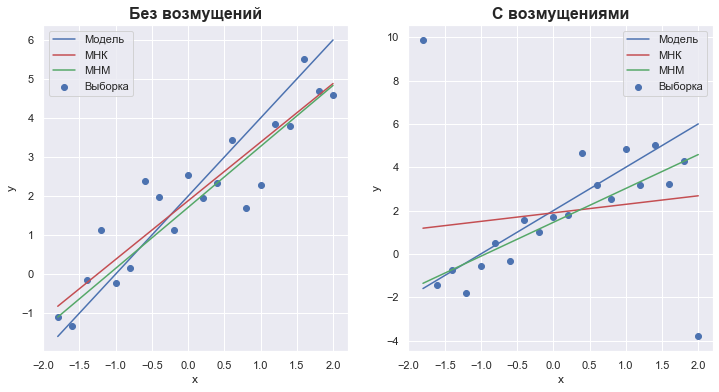

In [9]:
np.random.seed(42)
research()